# Introduction

The Future Sales competition는 과거 데이터가 주어지면 특정 상점의 월별 상품 판매량을 예측하는 것이 목표인 대회입니다.\
측정 지표는 RMSE를 사용합니다.\
실제 제출 target value는 0과 20사이에서 잘립니다. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
# load data
data_folder = "../data/"
items=pd.read_csv(data_folder + "items.csv")
shops=pd.read_csv(data_folder + "shops.csv")
cats=pd.read_csv(data_folder + "item_categories.csv")
train=pd.read_csv(data_folder + "sales_train.csv")
test=pd.read_csv(data_folder + "test.csv")
submission = pd.read_csv(data_folder + "sample_submission.csv")

# 0. Data Exploration

주어진 데이터에 대한 탐색을 진행하겠습니다.

## item.csv
- item_name : 판매 상품의 이름
- item_id : 판매 상품의 일련 번호
- item_category_id : 판매 상품의 소속 카테고리 번호

In [3]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [4]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


## shops.csv
- shop_name : 판매가게의 이름
- shop_id : 판매가게의 일련 번호

In [5]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


## item_categories.csv
- item_category_name : 판매 상품이 소속된 카테고리의 이름
- item_category_id : 판매 상품이 소속된 카테고리의 일련번호

In [7]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [8]:
cats.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


# sales_train.csv
- date : 판매 날짜
  - 일/월/년 의 형태로 구성되어 있다.
- date_block_num : 편의상 사용되는 연속된 월 번호
  - 2013년 1월은 0, 2013년 2월은 1,..., 2015년 10월은 33이다
- shop_id : 판매 상점의 일련 번호
- item_id : 판매 상품의 일련 번호
- item_price : 상품 1개의 현재 가격
- item_cnt_day : 하루에 판매된 상품의 수

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [10]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


## test.csv
- ID : (판매 가게, 판매 상품) 묶음의 일련 번호
- shop_id : 판매 가게에 대한 일련 번호
- item_id : 판매 상품에 대한 일련 번호

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [12]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


## sample_submission.csv
- ID : (판매 가게, 판매 상품) 묶음의 일련 번호
- item_cnt_month : 월 상품 판매 수

In [13]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              214200 non-null  int64  
 1   item_cnt_month  214200 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.3 MB


In [14]:
submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


# 1. Data Cleaning

이상치 제거, raw data 정제, 새로운 변수 추가를 진행하겠습니다

# Remove outliers

<Axes: xlabel='item_price'>

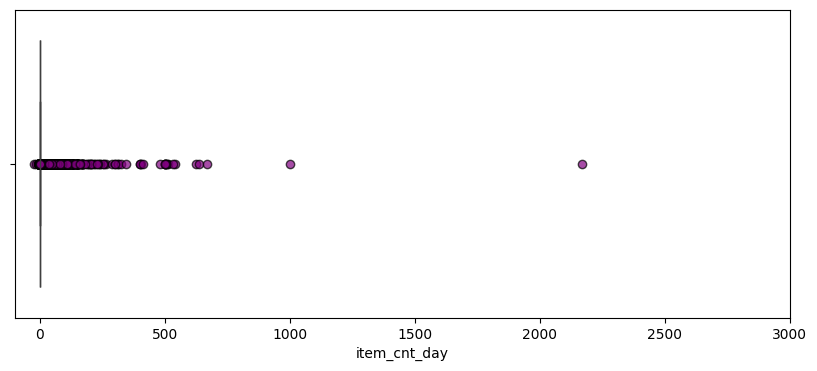

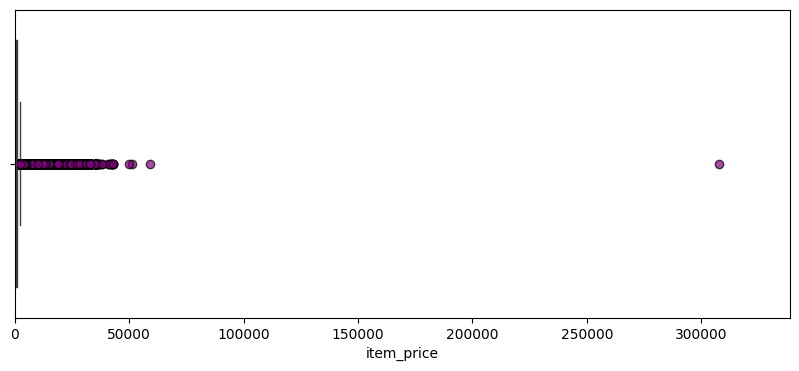

In [15]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
flierprops = dict(marker='o', markerfacecolor='purple', markersize=6,
                  linestyle='none', markeredgecolor='black', alpha=0.7)
sns.boxplot(x=train.item_cnt_day, flierprops=flierprops)

plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price, flierprops=flierprops)

하루에 1000개상 팔리거나
가격이 300000이상인 이상치를 삭제합니다.

In [16]:
train = train[(train.item_price < 300000 )& (train.item_cnt_day < 1000)]

item_price가 음수인 행을 삭제합니다.
- 환불일 수 있음\

item_cnt_day가 1미만인 행의 item_cnt_day를 0으로 치환합니다

In [17]:
train = train[train.item_price > 0].reset_index(drop = True)
train.loc[train.item_cnt_day < 1, "item_cnt_day"] = 0

# Shop Data 정제

여러 상점이 서로 중복된 것처럼 보인다.\
이는 같은 거리나 쇼핑 센터에 상점이 다시 문을 열거나 매장 위치를 옮겼기 때문일 수 있다.

In [18]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [19]:
# Якутск Орджоникидзе, 56
# shop_id 0과 57을 통합한다
train.loc[train.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57

# Якутск ТЦ "Центральный"
# shop_id 1과 58을 통합한다
train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58

# Жуковский ул. Чкалова 39м²
# shop_id 10과 11을 통합한다
train.loc[train.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11

일부 같은내용의 shop_name을 정리하고 shops 데이터 프레임에 city와 category 컬럼을 추가한다

In [20]:
shops.loc[ shops.shop_name == 'Сергиев Посад ТЦ "7Я"',"shop_name" ] = 'СергиевПосад ТЦ "7Я"'
shops["city"] = shops.shop_name.str.split(" ").map( lambda x: x[0] )
shops["category"] = shops.shop_name.str.split(" ").map( lambda x: x[1] )

# 특수기호가 들어간 city를 정리한다.
shops.loc[shops.city == "!Якутск", "city"] = "Якутск"

해당 shops.category중 원소 개수가 5개 이상인 경우에만 category를 유지하고 나머지는 other로 그룹화한다

In [21]:
category = []
for cat in shops.category.unique():
    if len(shops[shops.category == cat]) >= 5:
        category.append(cat)
shops.category = shops.category.apply( lambda x: x if (x in category) else "other" )

In [22]:
# LabelEncoder를 사용하여 category, city 칼럼을 정수화 해준다.
from sklearn.preprocessing import LabelEncoder
shops["shop_category"] = LabelEncoder().fit_transform( shops.category )
shops["shop_city"] = LabelEncoder().fit_transform( shops.city )
shops = shops[["shop_id", "shop_category", "shop_city"]]

In [23]:
shops

,shop_id,shop_category,shop_city
0,0,0,29
1,1,4,29
2,2,4,0
3,3,2,1
4,4,4,2
5,5,3,3
6,6,0,4
7,7,3,4
8,8,3,4
9,9,0,5


# cats 데이터 프레임 정제

In [24]:
cats

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [25]:
# item_category_name 칼럼의 값들을 공백으로 분리하고 첫번째 값을 type_code 칼럼으로 삽입한다.
cats["type_code"] = cats.item_category_name.apply( lambda x: x.split(" ")[0] ).astype(str)

# type_code 가  "Игровые" 또는 "Аксессуары" 인 행의 category 열을 "Игры"으로 초기화 한다.
# 조건에 맞지 않은 행은 NaN값이 들어간다.
cats.loc[ (cats.type_code == "Игровые")| (cats.type_code == "Аксессуары"), "category" ] = "Игры"

In [26]:
cats

,item_category_name,item_category_id,type_code,category
0,PC - Гарнитуры/Наушники,0,PC,NaN
1,Аксессуары - PS2,1,Аксессуары,Игры
2,Аксессуары - PS3,2,Аксессуары,Игры
3,Аксессуары - PS4,3,Аксессуары,Игры
4,Аксессуары - PSP,4,Аксессуары,Игры
...,...,...,...,...
79,Служебные,79,Служебные,NaN
80,Служебные - Билеты,80,Служебные,NaN
81,Чистые носители (шпиль),81,Чистые,NaN
82,Чистые носители (штучные),82,Чистые,NaN


In [27]:
# type_code 열의 고유값들 중에 개수가 5개 이상인 값은 유지하고 5개 미만인 값들은 'etc'로 통일한다.
category = []
for cat in cats.type_code.unique():
    if len(cats[cats.type_code == cat]) >= 5: 
        category.append( cat )
cats.type_code = cats.type_code.apply(lambda x: x if (x in category) else "etc")

In [28]:
cats

,item_category_name,item_category_id,type_code,category
0,PC - Гарнитуры/Наушники,0,etc,NaN
1,Аксессуары - PS2,1,Аксессуары,Игры
2,Аксессуары - PS3,2,Аксессуары,Игры
3,Аксессуары - PS4,3,Аксессуары,Игры
4,Аксессуары - PSP,4,Аксессуары,Игры
...,...,...,...,...
79,Служебные,79,etc,NaN
80,Служебные - Билеты,80,etc,NaN
81,Чистые носители (шпиль),81,etc,NaN
82,Чистые носители (штучные),82,etc,NaN


In [29]:
# LabelEncoder를 사용하여 type_code 열을 정수형 범주로 바꿔준다.
cats.type_code = LabelEncoder().fit_transform(cats.type_code)

# item_category_name 열의 값들을 '-'로 구분하고 리스트로 만들어 split행으로 삽입한다.
cats["split"] = cats.item_category_name.apply(lambda x: x.split("-"))

# split 열의 값 리스트의 원소개수가 2이상이면 2번째 원소를 공백제거한 값을, 1개 이하이면 첫번째 원소를 공백제거한 값을 'subtype'행으로 삽입한다.
cats["subtype"] = cats.split.apply(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())

# LabelEncoder를 사용하여 subtype 열을 정수형 범주로 바꿔준다.
cats["subtype_code"] = LabelEncoder().fit_transform( cats["subtype"] )

# cats 데이터 프레임을 정제한 정수형 범주값들만 남긴다.
cats = cats[["item_category_id", "subtype_code", "type_code"]]

In [30]:
cats

,item_category_id,subtype_code,type_code
0,0,29,0
1,1,9,1
2,2,10,1
3,3,11,1
4,4,13,1
...,...,...,...
79,79,54,0
80,80,25,0
81,81,62,0
82,82,63,0


# items 데이터프레임 정제

In [31]:
import re
def name_correction(x):
    x = x.lower() # 모든 글자 소문자로 변환
    x = x.partition('[')[0] # '[' 앞뒤로 구분하고 앞쪽값만 추출
    x = x.partition('(')[0] # '(' 앞뒤로 구분하고 앞쪽값만 추출
    x = re.sub('[^A-Za-z0-9А-Яа-я]+', ' ', x) # 특수문자 제거
    x = x.replace('  ', ' ') # 두개 이상의 연속된 공백을 공백 하나로 치환
    x = x.strip() # 앞뒤 공백 제거
    return x

item_name 정제

In [32]:
# 정규 표현식을 사용하여 특수 문자를 공백으로 대체하는 함수 정의
def replace_special_chars(text):
    if pd.isna(text):  # 텍스트가 NaN인지 확인
        return text
    text = str(text)  # 텍스트가 문자열인지 확인하고 문자열로 변환
    return re.sub(r'[^A-Za-z0-9А-Яа-я]+', ' ', text)

In [33]:
# 시작 브라켓('[', '(' )을 기준으로 앞뒤로 한번만 나누고 앞쪽은 name1로 '[' 뒤쪽은 name2, '(' 뒤쪽은 name3 행으로 삽입한다.
# 결과적으로 'name1' 열은 '(' 을 기준으로 앞쪽이 저장된다.
items["name1"], items["name2"] = items.item_name.apply(lambda x: x.split("[", 1)).str[0], items.item_name.apply(lambda x: x.split("[", 1)).str[1]
items["name1"], items["name3"] = items.item_name.apply(lambda x: x.split("(", 1)).str[0], items.item_name.apply(lambda x: x.split("(", 1)).str[1]

# name2, name3 열의 특수기호를 공백으로 치환하고 소문자로 변경한다
items["name2"] = items.name2.apply(replace_special_chars).str.lower()
items["name3"] = items.name3.apply(replace_special_chars).str.lower()

# items 데이터프레임의 결측치를 '0' 으로 치환한다.
items = items.fillna('0')

# item_name 열에 name_correction() 함수를 적용하고 저장한다.
items["item_name"] = items["item_name"].apply(lambda x: name_correction(x))

# name2가 "0"이 아닌 경우 마지막 대괄호인 ']'를 제외한 모든 문자를 반환하여 저장한다.
items.name2 = items.name2.apply( lambda x: x[:-1] if x !="0" else "0")

In [34]:
items

,item_name,item_id,item_category_id,name1,name2,name3
0,во власти наваждения,0,40,! ВО ВЛАСТИ НАВАЖДЕНИЯ,0,пласт d
1,abbyy finereader 12 professional edition full,1,76,!ABBYY FineReader 12 Professional Edition Full...,pc цифровая версия,0
2,в лучах славы,2,40,***В ЛУЧАХ СЛАВЫ,0,unv d
3,голубая волна,3,40,***ГОЛУБАЯ ВОЛНА,0,univ d
4,коробка,4,40,***КОРОБКА,0,стекло d
...,...,...,...,...,...,...
22165,ядерный титбит 2,22165,31,"Ядерный титбит 2 [PC, Цифровая версия]",pc цифровая версия,0
22166,язык запросов 1с предприятия,22166,54,Язык запросов 1С:Предприятия [Цифровая версия],цифровая версия,0
22167,язык запросов 1с предприятия 8,22167,49,Язык запросов 1С:Предприятия 8,0,cd хрусталева е ю
22168,яйцо для little inu,22168,62,Яйцо для Little Inu,0,0


items의 type 정제

In [35]:
# name2열을 공백으로 구분할 때 첫번째 단어가 'xbox'이면 첫번째부터 여덟번째 글자까지 슬라이싱하여 type행으로 삽입하고 
# 'xbox'가 아니라면 공백으로 구분한 첫번째 단어를 삽입한다.
items["type"] = items.name2.apply(lambda x: x[0:8] if x.split(" ")[0] == "xbox" else x.split(" ")[0] )

# type열이 'x360'이나 'xbox360'이나 'xbox 360'이면 'xbox 360'으로 변환한다.
items.loc[(items.type == "x360") | (items.type == "xbox360") | (items.type == "xbox 360") ,"type"] = "xbox 360"

# type열이 ""(빈 문자열)이면 'mac'으로 변환한다.
items.loc[ items.type == "", "type"] = "mac"

# type열이 " "(공백)이면 ""(빈 문자열)로 변환한다.
items.type = items.type.apply( lambda x: x.replace(" ", "") )

# type열이 'pc' or 'pс' or "pc" (ASCII 코드 등의 인코딩 방법의 차이로 다른 값임) 이면 'pc'로 변환한다
items.loc[ (items.type == 'pc' )| (items.type == 'pс') | (items.type == "pc"), "type" ] = "pc"

# type열의 값 'ps3'(ASCII 코드 등의 인코딩 방법의 차이로 다른 값임)을 'ps3'로 변환한다.
items.loc[ items.type == 'рs3' , "type"] = "ps3"

In [36]:
items

,item_name,item_id,item_category_id,name1,name2,name3,type
0,во власти наваждения,0,40,! ВО ВЛАСТИ НАВАЖДЕНИЯ,0,пласт d,0
1,abbyy finereader 12 professional edition full,1,76,!ABBYY FineReader 12 Professional Edition Full...,pc цифровая версия,0,pc
2,в лучах славы,2,40,***В ЛУЧАХ СЛАВЫ,0,unv d,0
3,голубая волна,3,40,***ГОЛУБАЯ ВОЛНА,0,univ d,0
4,коробка,4,40,***КОРОБКА,0,стекло d,0
...,...,...,...,...,...,...,...
22165,ядерный титбит 2,22165,31,"Ядерный титбит 2 [PC, Цифровая версия]",pc цифровая версия,0,pc
22166,язык запросов 1с предприятия,22166,54,Язык запросов 1С:Предприятия [Цифровая версия],цифровая версия,0,цифровая
22167,язык запросов 1с предприятия 8,22167,49,Язык запросов 1С:Предприятия 8,0,cd хрусталева е ю,0
22168,яйцо для little inu,22168,62,Яйцо для Little Inu,0,0,0


In [37]:
# type별로 item_id의 개수를 계산한다
group_sum = items.groupby(["type"]).agg({"item_id": "count"})
# .reset_index() 함수로 type열을 추가한다
group_sum = group_sum.reset_index()

drop_cols = []
# type열의 unique값을 순회하면서 개수가 40미만인 type을 drop_cols에 모은다.
for cat in group_sum.type.unique():
    if group_sum.loc[(group_sum.type == cat), "item_id"].values[0] <40:
        drop_cols.append(cat)

# drop_cols에 포함되면 name2를 'other'로 치환한다
items.name2 = items.name2.apply( lambda x: "other" if (x in drop_cols) else x )
# type열은 삭제한다.
items = items.drop(["type"], axis = 1)

In [38]:
# name2와 name3열을 정수형 범주로 변환하고 item_id, item_category_id, name2, name3만 남긴다.
items.name2 = LabelEncoder().fit_transform(items.name2)
items.name3 = LabelEncoder().fit_transform(items.name3)

items.drop(["item_name", "name1"],axis = 1, inplace= True)
items.head()

,item_id,item_category_id,name2,name3
0,0,40,4,1331
1,1,76,64,42
2,2,40,4,1011
3,3,40,4,1010
4,4,40,4,1572


# Preprocessing

month, shop, item 의 모든 조합을 month가 증가하는 순서대로 정렬한 행렬 df를 생성한다.\
Item_cnt_day는 item_cnt_month로 합산된다.

In [39]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,0.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935840,10.10.2015,33,25,7409,299.00,1.0
2935841,09.10.2015,33,25,7460,299.00,1.0
2935842,14.10.2015,33,25,7459,349.00,1.0
2935843,22.10.2015,33,25,7440,299.00,1.0


In [40]:
from itertools import product
sales = train[train.date_block_num == 12]
list( product( [12], sales.shop_id.unique(), sales.item_id.unique() ) )

[(12, 54, 10297),
 (12, 54, 10296),
 (12, 54, 10298),
 (12, 54, 10300),
 (12, 54, 10284),
 (12, 54, 10292),
 (12, 54, 10109),
 (12, 54, 10107),
 (12, 54, 10121),
 (12, 54, 10143),
 (12, 54, 10097),
 (12, 54, 10148),
 (12, 54, 10163),
 (12, 54, 10287),
 (12, 54, 10164),
 (12, 54, 10302),
 (12, 54, 10376),
 (12, 54, 10563),
 (12, 54, 10090),
 (12, 54, 10325),
 (12, 54, 10331),
 (12, 54, 10334),
 (12, 54, 10337),
 (12, 54, 10303),
 (12, 54, 10340),
 (12, 54, 10343),
 (12, 54, 10347),
 (12, 54, 10348),
 (12, 54, 10351),
 (12, 54, 10354),
 (12, 54, 9902),
 (12, 54, 10079),
 (12, 54, 9904),
 (12, 54, 9905),
 (12, 54, 9921),
 (12, 54, 9926),
 (12, 54, 9931),
 (12, 54, 10253),
 (12, 54, 9942),
 (12, 54, 9943),
 (12, 54, 9947),
 (12, 54, 9948),
 (12, 54, 9958),
 (12, 54, 9962),
 (12, 54, 9901),
 (12, 54, 9872),
 (12, 54, 9871),
 (12, 54, 9799),
 (12, 54, 9800),
 (12, 54, 9797),
 (12, 54, 9784),
 (12, 54, 9801),
 (12, 54, 10254),
 (12, 54, 9806),
 (12, 54, 9812),
 (12, 54, 9828),
 (12, 54, 9842)

In [41]:
from itertools import product # cartesian product
import time

ts = time.time()
matrix = []
cols  = ["date_block_num", "shop_id", "item_id"]
for i in range(34):
    # 각 월마다 상품이 팔린 데이터
    sales = train[train.date_block_num == i]
    # matrix에 date_block_num 별 (date_block_num, shop_id, item_id)의 모든 조합을 삽입한다.
    matrix.append( np.array(list( product( [i], sales.shop_id.unique(), sales.item_id.unique() ) ), dtype = np.int16) )

# list를 행단위로 연결하고 columns는 cols로 설정하여 데이터프레임으로 만든다.
matrix = pd.DataFrame( np.vstack(matrix), columns = cols )
# 정수형으로 형변환 시킨다
matrix["date_block_num"] = matrix["date_block_num"].astype(np.int8)
matrix["shop_id"] = matrix["shop_id"].astype(np.int8)
matrix["item_id"] = matrix["item_id"].astype(np.int16)
# date_block_num > shop_id > item_id 순으로 정렬한다.
matrix.sort_values( cols, inplace = True )
time.time()- ts

6.991116285324097

In [42]:
# item_cnt_day(하루에 판매된 상품개수) * item_price(상품 가격) -> revenue(하루 상품 매출)
train["revenue"] = train["item_cnt_day"] * train["item_price"]

In [43]:
ts = time.time()
# train을 date_block_num, shop_id, item_id 순으로 묶고 item_cnt_day의 합을 구한다.
group = train.groupby( ["date_block_num", "shop_id", "item_id"] ).agg( {"item_cnt_day": ["sum"]} )
# group의 칼럼을 item_cnt_month(월별 판매 수량)으로 변경한다
group.columns = ["item_cnt_month"]
# |date_block_num |	shop_id | item_id | item_cnt_month | 의 모습으로 columns 변경
group.reset_index( inplace = True)
# ["date_block_num", "shop_id", "item_id"] 기준으로 matrix에 group을 inner join 한다
matrix = pd.merge( matrix, group, on = cols, how = "left" )
# item_cnt_month(월별 판매 수량)의 결측치는 0으로 채워주고 실수로 형변환 한다.
matrix["item_cnt_month"] = matrix["item_cnt_month"].fillna(0).astype(np.float16)
time.time() - ts

3.7618155479431152

date_block_num이 34인 테스트 set을 생성한다

In [44]:
test["date_block_num"] = 34
test["date_block_num"] = test["date_block_num"].astype(np.int8)
test["shop_id"] = test.shop_id.astype(np.int8)
test["item_id"] = test.item_id.astype(np.int16)

matrix과 test set을 연결한다

In [45]:
ts = time.time()
# matrix에 "ID"를 drop한 test를 행기준 + 행단위로 연결한다.
matrix = pd.concat([matrix, test.drop(["ID"],axis = 1)], ignore_index=True, sort=False, keys=cols)
# 기존 test set의 결측치는 0으로 채워준다
matrix.fillna( 0, inplace = True )
time.time() - ts

C:\Users\CONET-20\AppData\Local\Temp\ipykernel_21660\3889552792.py:3: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  matrix = pd.concat([matrix, test.drop(["ID"],axis = 1)], ignore_index=True, sort=False, keys=cols)


0.07180666923522949

matrix에 shops, items, cats의 데이터를 추가합니다.

In [46]:
ts = time.time()
# matrix와 shops, items, cats를 각각의 id를 기준으로 left inner join한다.
matrix = pd.merge( matrix, shops, on = ["shop_id"], how = "left" )
matrix = pd.merge(matrix, items, on = ["item_id"], how = "left")
matrix = pd.merge( matrix, cats, on = ["item_category_id"], how = "left" )

# 정수형으로 형변환한다
matrix["shop_city"] = matrix["shop_city"].astype(np.int8)
matrix["shop_category"] = matrix["shop_category"].astype(np.int8)
matrix["item_category_id"] = matrix["item_category_id"].astype(np.int8)
matrix["subtype_code"] = matrix["subtype_code"].astype(np.int8)
matrix["name2"] = matrix["name2"].astype(np.int8)
matrix["name3"] = matrix["name3"].astype(np.int16)
matrix["type_code"] = matrix["type_code"].astype(np.int8)
time.time() - ts

3.1315572261810303

피처 엔지니어링
- matrix의 feature에 lag feature를 추가한다

In [47]:
# # lag_feature(과거의 값)를 정의하는 함수
# def lag_feature(df, lags, cols):
#     for col in cols:
#         print(col)
#         # 각 시차(lag) 값에 대해 반복합니다.
#         for lag in lags:
#             # 시차 피처의 이름을 지정합니다.
#             lag_col_name = f"{col}_lag_{lag}"
#             # 시차를 적용하여 새로운 컬럼을 생성합니다.
#             df[lag_col_name] = df[col].shift(lag)
#     return df
def lag_feature( df,lags, cols ):
    for col in cols:
        print(col)
        tmp = df[["date_block_num", "shop_id","item_id",col ]]
        for i in lags:
            shifted = tmp.copy()
            shifted.columns = ["date_block_num", "shop_id", "item_id", col + "_lag_"+str(i)]
            shifted.date_block_num = shifted.date_block_num + i
            df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    return df

item_cnt_month의 lag feature 생성

In [48]:
ts = time.time()
# item_cnt_month에 대한 1,2,3 월 전 lag feature 추가
matrix = lag_feature( matrix, [1,2,3], ["item_cnt_month"] )
time.time() - ts

item_cnt_month


17.212876558303833

In [57]:
# matrix
matrix.loc[(matrix.shop_id ==45)& (matrix.item_id==18454)]

,date_block_num,shop_id,item_id,item_cnt_month,shop_category,shop_city,item_category_id,name2,name3,subtype_code,type_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3
8334641,23,45,18454,4.0,4,20,55,4,42,2,7,NaN,NaN,NaN
8648253,24,45,18454,2.0,4,20,55,4,42,2,7,4.0,NaN,NaN
8933921,25,45,18454,1.0,4,20,55,4,42,2,7,2.0,4.0,NaN
9213280,26,45,18454,1.0,4,20,55,4,42,2,7,1.0,2.0,4.0
9479294,27,45,18454,0.0,4,20,55,4,42,2,7,1.0,1.0,2.0
9719746,28,45,18454,0.0,4,20,55,4,42,2,7,0.0,1.0,1.0
9944912,29,45,18454,0.0,4,20,55,4,42,2,7,0.0,0.0,1.0
10172413,30,45,18454,0.0,4,20,55,4,42,2,7,0.0,0.0,0.0
10389787,31,45,18454,0.0,4,20,55,4,42,2,7,0.0,0.0,0.0
10608752,32,45,18454,0.0,4,20,55,4,42,2,7,0.0,0.0,0.0


전월 평균 item_cnt를 추가합니다.

In [58]:
ts = time.time()
# 월별 모든 item에 대한 item_cnt_month의 평균 생성
group = matrix.groupby( ["date_block_num"] ).agg({"item_cnt_month" : ["mean"]})
# columns명 date_avg_item_cnt로 변경
group.columns = ["date_item_avg_item_cnt"]
# date_block_num을 인덱스에서 칼럼으로 변경
group.reset_index(inplace = True)

# matrix에 date_avg_item_cnt 칼럼 추가
matrix = pd.merge(matrix, group, on = ["date_block_num"], how = "left")
# date_avg_item_cnt 실수형 형변환
matrix.date_avg_item_cnt = matrix["date_item_avg_item_cnt"].astype(np.float16)
# date_avg_item_cnt 1달전 lag feature 추가
matrix = lag_feature( matrix, [1], ["date_item_avg_item_cnt"] )
# 당월 date_avg_item_cnt 삭제
matrix.drop( ["date_item_avg_item_cnt"], axis = 1, inplace = True )
time.time() - ts

C:\Users\CONET-20\AppData\Local\Temp\ipykernel_21660\4290585592.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  matrix.date_avg_item_cnt = matrix["date_item_avg_item_cnt"].astype(np.float16)


date_item_avg_item_cnt


5.860656261444092

In [61]:
matrix.loc[(matrix.shop_id ==45)& (matrix.item_id==18454)]

,date_block_num,shop_id,item_id,item_cnt_month,shop_category,shop_city,item_category_id,name2,name3,subtype_code,type_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,date_item_avg_item_cnt_lag_1
8334641,23,45,18454,4.0,4,20,55,4,42,2,7,NaN,NaN,NaN,NaN
8648253,24,45,18454,2.0,4,20,55,4,42,2,7,4.0,NaN,NaN,0.511900
8933921,25,45,18454,1.0,4,20,55,4,42,2,7,2.0,4.0,NaN,0.359339
9213280,26,45,18454,1.0,4,20,55,4,42,2,7,1.0,2.0,4.0,0.296737
9479294,27,45,18454,0.0,4,20,55,4,42,2,7,1.0,1.0,2.0,0.293929
9719746,28,45,18454,0.0,4,20,55,4,42,2,7,0.0,1.0,1.0,0.302861
9944912,29,45,18454,0.0,4,20,55,4,42,2,7,0.0,0.0,1.0,0.311613
10172413,30,45,18454,0.0,4,20,55,4,42,2,7,0.0,0.0,0.0,0.286404
10389787,31,45,18454,0.0,4,20,55,4,42,2,7,0.0,0.0,0.0,0.276623
10608752,32,45,18454,0.0,4,20,55,4,42,2,7,0.0,0.0,0.0,0.308554


(월 /item_id) 별로 그룹화하여 item_cnt_month의 평균값을 구한다.\
구한 평균값에 대한 lag feature들을 추가하고 date_item_avg_item_cnt는 삭제한다.

In [62]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','item_id'], how='left')
matrix.date_item_avg_item_cnt = matrix['date_item_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1,2,3], ['date_item_avg_item_cnt'])
matrix.drop(['date_item_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

date_item_avg_item_cnt


19.11847734451294

(월 /shop_id) 별로 그룹화하여 item_cnt_month의 평균값을 구한다.\
구한 평균값에 대한 lag feature들을 추가하고 date_item_avg_item_cnt는 삭제한다.

In [63]:
ts = time.time()
group = matrix.groupby( ["date_block_num","shop_id"] ).agg({"item_cnt_month" : ["mean"]})
group.columns = ["date_shop_avg_item_cnt"]
group.reset_index(inplace = True)

matrix = pd.merge(matrix, group, on = ["date_block_num","shop_id"], how = "left")
matrix.date_avg_item_cnt = matrix["date_shop_avg_item_cnt"].astype(np.float16)
matrix = lag_feature( matrix, [1,2,3], ["date_shop_avg_item_cnt"] )
matrix.drop( ["date_shop_avg_item_cnt"], axis = 1, inplace = True )
time.time() - ts

C:\Users\CONET-20\AppData\Local\Temp\ipykernel_21660\2922083602.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  matrix.date_avg_item_cnt = matrix["date_shop_avg_item_cnt"].astype(np.float16)


date_shop_avg_item_cnt


18.08328890800476

(월 /shop_id/item_id) 별로 그룹화하여 item_cnt_month의 평균값을 구한다.\
구한 평균값에 대한 lag feature들을 추가하고 date_item_avg_item_cnt는 삭제한다.

In [64]:
ts = time.time()
group = matrix.groupby( ["date_block_num","shop_id","item_id"] ).agg({"item_cnt_month" : ["mean"]})
group.columns = ["date_shop_item_avg_item_cnt"]
group.reset_index(inplace = True)

matrix = pd.merge(matrix, group, on = ["date_block_num","shop_id","item_id"], how = "left")
matrix.date_avg_item_cnt = matrix["date_shop_item_avg_item_cnt"].astype(np.float16)
matrix = lag_feature( matrix, [1,2,3], ["date_shop_item_avg_item_cnt"] )
matrix.drop( ["date_shop_item_avg_item_cnt"], axis = 1, inplace = True )
time.time() - ts

C:\Users\CONET-20\AppData\Local\Temp\ipykernel_21660\2958969161.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  matrix.date_avg_item_cnt = matrix["date_shop_item_avg_item_cnt"].astype(np.float16)


date_shop_item_avg_item_cnt


25.059080362319946

(월 /shop_id/subtype_code) 별로 그룹화하여 item_cnt_month의 평균값을 구한다.\
구한 평균값에 대한 lag feature들을 추가하고 date_item_avg_item_cnt는 삭제한다.

In [65]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'shop_id', 'subtype_code']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_subtype_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'subtype_code'], how='left')
matrix.date_shop_subtype_avg_item_cnt = matrix['date_shop_subtype_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_shop_subtype_avg_item_cnt'])
matrix.drop(['date_shop_subtype_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

date_shop_subtype_avg_item_cnt


8.20283031463623

(월 /shop_city) 별로 그룹화하여 item_cnt_month의 평균값을 구한다.\
구한 평균값에 대한 lag feature들을 추가하고 date_item_avg_item_cnt는 삭제한다.

In [66]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'shop_city']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_city_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', "shop_city"], how='left')
matrix.date_city_avg_item_cnt = matrix['date_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_city_avg_item_cnt'])
matrix.drop(['date_city_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

date_city_avg_item_cnt


7.913140773773193

(월 /item_id, shop_city) 별로 그룹화하여 item_cnt_month의 평균값을 구한다.\
구한 평균값에 대한 lag feature들을 추가하고 date_item_avg_item_cnt는 삭제한다.

In [67]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'item_id', 'shop_city']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_city_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'item_id', 'shop_city'], how='left')
matrix.date_item_city_avg_item_cnt = matrix['date_item_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_item_city_avg_item_cnt'])
matrix.drop(['date_item_city_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

date_item_city_avg_item_cnt


14.125334024429321

* matrix 데이터프레임에 평균 상품 가격을 추가한다.
* 월별 item price의 lag 값을 추가한다.
* delta price values 추가 - 현재 월 평균 가격이 글로벌 평균과 어떻게 관련되는지 추가합니다.

In [68]:
ts = time.time()
# item_id별로 그룹화하여 item_price 평균 계산
group = train.groupby( ["item_id"] ).agg({"item_price": ["mean"]})
group.columns = ["item_avg_item_price"]
group.reset_index(inplace = True)

# matrix에 item_avg_item_price 추가
matrix = matrix.merge( group, on = ["item_id"], how = "left" )
matrix["item_avg_item_price"] = matrix.item_avg_item_price.astype(np.float16)

# (월/item_id)로 그룹화하여 item_price 평균 계산
group = train.groupby( ["date_block_num","item_id"] ).agg( {"item_price": ["mean"]} )
group.columns = ["date_item_avg_item_price"]
group.reset_index(inplace = True)

# matrix에 date_item_avg_item_price 추가
matrix = matrix.merge(group, on = ["date_block_num","item_id"], how = "left")
matrix["date_item_avg_item_price"] = matrix.date_item_avg_item_price.astype(np.float16)
lags = [1, 2, 3]
matrix = lag_feature( matrix, lags, ["date_item_avg_item_price"] )
# lag 별로 (lag만큼의 이전 달의 아이템별 평균)과 (전체 기간의 아이템별 평균)의 비율을 delta_price_lag_1,2,3 으로 추가한다. 
for i in lags:
    matrix["delta_price_lag_" + str(i) ] = (matrix["date_item_avg_item_price_lag_" + str(i)]- matrix["item_avg_item_price"] )/ matrix["item_avg_item_price"]

# input으로 주어진 row의 delta_price_lag_1,2,3 중에 1,2,3 순서로 0이 아닌값이 있다면 그 값을 리턴, delta_price_lag_1,2,3 모두 0값이면 0을 리턴하는 함수 추가
def select_trends(row) :
    for i in lags:
        if row["delta_price_lag_" + str(i)]:
            return row["delta_price_lag_" + str(i)]
    return 0

matrix["delta_price_lag"] = matrix.apply(select_trends, axis = 1)
matrix["delta_price_lag"] = matrix.delta_price_lag.astype( np.float16 )
# delta_price_lag의 결측치는 0으로 채운다
matrix["delta_price_lag"].fillna( 0 ,inplace = True)

# 피처 삭제
features_to_drop = ["item_avg_item_price", "date_item_avg_item_price"]
for i in lags:
    features_to_drop.append("date_item_avg_item_price_lag_" + str(i) )
    features_to_drop.append("delta_price_lag_" + str(i) )
matrix.drop(features_to_drop, axis = 1, inplace = True)
time.time() - ts

date_item_avg_item_price


C:\Users\CONET-20\AppData\Local\Temp\ipykernel_21660\668347475.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matrix["delta_price_lag"].fillna( 0 ,inplace = True)


135.26712369918823

- matix 데이터프레임에 월별 전체 상점 revenue를 추가한다.
- 월별 revenue의 lag 값을 추가한다.
- 현재 월 revenue가 전체기간 revenue와 어떠한 비율을 가졌는지 의미하는 delta revenue를 추가한다.

In [69]:
ts = time.time()
group = train.groupby( ["date_block_num","shop_id"] ).agg({"revenue": ["sum"] })
group.columns = ["date_shop_revenue"]
group.reset_index(inplace = True)

matrix = matrix.merge( group , on = ["date_block_num", "shop_id"], how = "left" )
matrix['date_shop_revenue'] = matrix['date_shop_revenue'].astype(np.float32)

group = group.groupby(["shop_id"]).agg({ "date_block_num":["mean"] })
group.columns = ["shop_avg_revenue"]
group.reset_index(inplace = True )

matrix = matrix.merge( group, on = ["shop_id"], how = "left" )
matrix["shop_avg_revenue"] = matrix.shop_avg_revenue.astype(np.float32)
matrix["delta_revenue"] = (matrix['date_shop_revenue'] - matrix['shop_avg_revenue']) / matrix['shop_avg_revenue']
matrix["delta_revenue"] = matrix["delta_revenue"]. astype(np.float32)

matrix = lag_feature(matrix, [1], ["delta_revenue"])
matrix["delta_revenue_lag_1"] = matrix["delta_revenue_lag_1"].astype(np.float32)
matrix.drop( ["date_shop_revenue", "shop_avg_revenue", "delta_revenue"] ,axis = 1, inplace = True)
time.time() - ts

delta_revenue


8.532038688659668

데이터프레임 matrix에 0-11사이의 월 값과 월별 일 수를 추가한다.

In [70]:
matrix["month"] = matrix["date_block_num"] % 12
days = pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])
matrix["days"] = matrix["month"].map(days).astype(np.int8)

데이터프레임 matrix에 각 shop과 item의 첫 판매 월을 추가한다.

In [71]:
ts = time.time()
matrix["item_shop_first_sale"] = matrix["date_block_num"] - matrix.groupby(["item_id","shop_id"])["date_block_num"].transform('min')
matrix["item_first_sale"] = matrix["date_block_num"] - matrix.groupby(["item_id"])["date_block_num"].transform('min')
time.time() - ts

1.6149871349334717

데이터프레임 matrix에서 처음 3개월 값을 삭제한다 <- lag feature에 결측치가 있다.

In [72]:
ts = time.time()
matrix = matrix[matrix["date_block_num"] > 3]
time.time() - ts

1.271202564239502

In [76]:
matrix.head().T

,1497465,1497466,1497467,1497468,1497469
date_block_num,4.000000,4.000000,4.0,4.000000,4.000000
shop_id,2.000000,2.000000,2.0,2.000000,2.000000
item_id,27.000000,28.000000,29.0,30.000000,31.000000
item_cnt_month,0.000000,0.000000,0.0,0.000000,0.000000
shop_category,4.000000,4.000000,4.0,4.000000,4.000000
shop_city,0.000000,0.000000,0.0,0.000000,0.000000
item_category_id,19.000000,30.000000,23.0,40.000000,37.000000
name2,76.000000,107.000000,123.0,4.000000,4.000000
name3,42.000000,42.000000,42.0,42.000000,562.000000
subtype_code,10.000000,55.000000,16.0,4.000000,1.000000


# Modelling

# 주석
gc : garbage collection : 메모리 정리에 관련된 모듈\
pickle : 객체를 파일로 저장하고 불러오는 모듈\
xgboost : XGBoost를 구현한 모듈, scikit-learn에 포함된 모듈이 아님, 호환은 됨

In [ ]:
import gc
import pickle
from xgboost import XGBRegressor
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

gc.collect() : 메모리 수거

In [ ]:
data = matrix.copy()
del matrix
gc.collect()

In [ ]:
data[data["date_block_num"]==34].shape

Use month 34 as validation for training.

In [ ]:
X_train = data[data.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = data[data.date_block_num < 33]['item_cnt_month']
X_valid = data[data.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = data[data.date_block_num == 33]['item_cnt_month']
X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [ ]:
Y_train = Y_train.clip(0, 20)
Y_valid = Y_valid.clip(0, 20)

In [ ]:
del data
gc.collect();

In [ ]:
ts = time.time()

model = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
#     tree_method='gpu_hist',
    seed=42)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 20)

time.time() - ts

In [ ]:
Y_pred = model.predict(X_valid).clip(0, 20)
Y_test = model.predict(X_test).clip(0, 20)

submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('xgb_submission.csv', index=False)

In [ ]:
from xgboost import plot_importance

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(model, (10,14))